# Model Selection, Underfitting and Overfitting

In machine learning, our goal is to discover general patterns. For example, we might want to learn an association between genetic markers and the development of dementia in adulthood. Our hope would be to uncover a pattern that could be applied successfully to assess risk for the entire population.

However, when we train models, we don’t have access to the entire population (or current or potential humans). Instead, we can access only a small, finite sample. Even in a large hospital system, we might get hundreds of thousands of medical records. Given such a finite sample size, it’s possible to uncover spurious associations that don’t hold up for unseen data.

Let’s consider an extreme pathological case. Imagine that you want to learn to predict which people will repay their loans. A lender hires you as a data scientist to investigate the case and gives you complete files on 100 applicants, of which 5 defaulted on their loans within 3 years. The files might include hundreds of features including income, occupation, credit score, length of employment etcetera. Imagine that they additionally give you video footage of their interview with a lending agent. That might seem like a lot of data!

Now suppose that after generating an enormous set of features, you discover that of the 5 applicants who defaults, all 5 were wearing blue shirts during their interviews, while only 40% of general population wore blue shirts. There’s a good chance that any model you train would pick up on this signal and use it as an important part of its learned pattern.

Even if defaulters are no more likely to wear blue shirts, there’s a 1% chance that we’ll observe all five defaulters wearing blue shirts. And keeping the sample size low while we have hundreds or thousands of features, we may observe a large number of spurious correlations. Given trillions of training examples, these false associations might disappear. But we seldom have that luxury.

The phenomena of fitting our training distribution more closely than the real distribution is called overfitting, and the techniques used to combat overfitting are called regularization.
More to the point, in the previous sections we observed this effect on the Fashion-MNIST dataset. If you altered the model structure or the hyper-parameters during the experiment, you may have found that for some choices the model might not have been as accurate when using the testing data set compared to when the training data set was used.


## Training Error and Generalization Error

Before we can explain this phenomenon, we need to differentiate between training and a generalization error.  In layman's terms, training error refers to the error exhibited by the model during its use of the training data set and generalization error refers to any expected error when applying the model to an imaginary stream of additional data drawn from the underlying data distribution. The latter is often estimated by applying the model to the test set. In the previously discussed loss functions, for example, the squared loss function used for linear regression or the cross-entropy loss function used for softmax regression, can be used to calculate training and generalization error rates.

The following three thought experiments will help illustrate this situation better. Consider a college student trying to prepare for his final exam. A diligent student will strive to practice well and test his abilities using exams from previous years. Nonetheless, doing well on past exams is no guarantee that he will excel when it matters. For instance, the student might try to prepare by rote learning the answers to the exam questions. This requires the student to memorize many things. He might even remember the answers for past exams perfectly. Another student might prepare by trying to understand the reasons for giving certain answers. In most cases, the latter student will do much better.

Likewise, we would expect that a model that simply performs table lookup to answer questions. If the inputs are discrete, this might very well work after seeing *many* examples. Nonetheless, such a model is unlikely to work well in practice, as data is often real-valued and more scarce than we would like. Furthermore, we only have a finite amount of RAM to store our model in.

Lastly, consider a trivial classification problem. Our training data consists of labels only, namely 0 for heads and 1 for tails, obtained by tossing a fair coin. No matter what we do, the generalization error will always be $\frac{1}{2}$. Yet the training error may be quite a bit less than that, depending on the luck of the draw. E.g. for the dataset {0, 1, 1, 1, 0, 1} we will 'predict' class 1 and incur an error of $\frac{1}{3}$, which is considerably better than what it should be. We can also see that as we increase the amount of data, the probability for large deviations from $\frac{1}{2}$ will diminish and the training error will be close to it, too. This is because our model 'overfit' to the data and since things will 'average out' as we increase the amount of data.

### Statistical Learning Theory

There is a formal theory of this phenomenon. Glivenko and Cantelli derived in their [eponymous theorem](https://en.wikipedia.org/wiki/Glivenko%E2%80%93Cantelli_theorem) the rate at which the training error converges to the generalization error. In a series of seminal papers [Vapnik and Chervonenkis](https://en.wikipedia.org/wiki/Vapnik%E2%80%93Chervonenkis_theory) extended this to much more general function classes. This laid the foundations of [Statistical Learning Theory](https://en.wikipedia.org/wiki/Statistical_learning_theory).

Unless stated otherwise, we assume that both the training set and the test set are drawn independently and identically drawn from the same distribution. This means that in drawing from the distribution there is no memory between draws. Moreover, it means that we use the same distribution in both cases. Obvious cases where this might be violated is if we want to build a face recognition by training it on elementary students and then want to deploy it in the general population. This is unlikely to work since, well, the students tend to look quite different from the general population. By training we try to find a function that does particularly well on the training data. If the function is very flexible such as to be able to adapt well to any details in the training data, it might do a bit too well. This is precisely what we want to avoid (or at least control). Instead we want to find a model that reduces the generalization error. A lot of tuning in deep learning is devoted to making sure that this does not happen.

### Model Complexity

When we have simple models and abundant data, we expect the generalization error to resemble the training error. When we work with more complex models and fewer examples, we expect the training error to go down but the generalization gap to grow. What precisely constitutes model complexity is a complex matter. Many factors govern whether a model will generalize well. For example a model with more parameters might be considered more complex. A model whose parameters can take a wider range of values might be more complex. Often with neural networks, we think of a model that takes more training steps as more complex, and one subject to early stopping as less complex.

It can be difficult to compare the complexity among members of very different model classes (say decision trees versus neural networks). For now a simple rule of thumb is quite useful: A model that can readily explain arbitrary facts is what statisticians view as complex, whereas one that has only a limited expressive power but still manages to explain the data well is probably closer to the truth. In philosophy this is closely related to Popper’s criterion of [falsifiability](https://en.wikipedia.org/wiki/Falsifiability) of a scientific theory: a theory is good if it fits data and if there are specific tests which can be used to disprove it. This is important since all statistical estimation is [post hoc](https://en.wikipedia.org/wiki/Post_hoc), i.e. we estimate after we observe the facts, hence vulnerable to the associated fallacy. Ok, enough of philosophy, let’s get to more tangible issues.
To give you some intuition in this chapter, we’ll focus on a few factors that tend to influence the generalizability of a model class:

1. The number of tunable parameters. When the number of tunable parameters, sometimes denoted as the number of degrees of freedom, is large, models tend to be more susceptible to overfitting.
1. The values taken by the parameters. When weights can take a wider range of values, models can be more susceptible to over fitting.
1. The number of training examples. It’s trivially easy to overfit a dataset containing only one or two examples even if your model is simple. But overfitting a dataset with millions of examples requires an extremely flexible model.


## Model Selection

In machine learning we usually select our model based on an evaluation of the performance of several candidate models.  This process is called model selection. The candidate models can be similar models using different hyper-parameters.  Using the multilayer perceptron as an example, we can select the number of hidden layers as well as the number of hidden units, and activation functions in each hidden layer.  A significant effort in model selection is usually required in order to end up with an effective model.  In the following section we will be describing the validation data set often used in model selection.


### Validation Data Set

Strictly speaking, the test set can only be used after all the hyper-parameters and model parameters have been selected. In particular, the test data must not be used in model selection process, such as in the tuning of hyper-parameters.  We should not rely solely on the training data during model selection, since the generalization error rate cannot be estimated from the training error rate.  Bearing this in mind, we can reserve a portion of data outside of the training and testing data sets to be used in model selection.  This reserved data is known as the validation data set, or validation set.  For example, a small, randomly selected portion from a given training set can be used as a validation set, with the remainder used as the true training set.

However, in practical applications the test data is rarely discarded after one use since it’s not easily obtainable.  Therefore, in practice, there may be unclear boundaries between validation and testing data sets.  Unless explicitly stated, the test data sets used in the experiments provided in this book should be considered as validation sets, and the test accuracy in the experiment report are for validation accuracy. The good news is that we don't need too much data in the validation set. The uncertainty in our estimates can be shown to be of the order of $O(n^{-\frac{1}{2}})$.


### $K$-Fold Cross-Validation

When there is not enough training data, it is considered excessive to reserve a large amount of validation data, since the validation data set does not play a part in model training.  A solution to this is the $K$-fold cross-validation method. In  $K$-fold cross-validation, the original training data set is split into $K$ non-coincident sub-data sets. Next, the model training and validation process is repeated $K$ times.  Every time the validation process is repeated, we validate the model using a sub-data set and use the $K-1$ sub-data set to train the model.  The sub-data set used to validate the model is continuously changed throughout this $K$ training and validation process.  Finally, the average over $K$ training and validation error rates are calculated respectively.


## Underfitting and Overfitting

Next, we will look into two common problems that occur during model training.  One type of problem occurs when the model is unable to reduce training errors since the model is too simplistic. This phenomenon is known as underfitting.  As discussed, another type of problem is when the number of model training errors is significantly less than that of the testing data set, also known as overfitting.  In practice, both underfitting and overfitting should be dealt with simultaneously whenever possible.  Although many factors could cause the above two fitting problems, for the time being we’ll be focusing primarily on two factors: model complexity and training data set size.

### Model Complexity

We use polynomials as a way to illustrate the issue. Given training data consisting of the scalar data feature $x$ and the corresponding scalar label $y$, we try to find a polynomial of degree $d$

$$\hat{y}= \sum_{i=0}^d x^i w_i$$

to estimate $y$. Here $w_i$ refers to the model’s weight parameter. The bias is implicit in $w_0$ since $x^0 = 1$. Similar to linear regression we also use a squared loss for simplicity (note that $d = 1$ we recover linear regression).

A higher order polynomial function is more complex than a lower order polynomial function, since the higher-order polynomial has more parameters and the model function’s selection range is wider.  Therefore, using the same training data set, higher order polynomial functions should be able to achieve a lower training error rate (relative to lower degree polynomials).  Bearing in mind the given training data set, the typical relationship between model complexity and error is shown in the diagram below. If the model is too simple for the dataset, we are likely to see underfitting, whereas if we pick an overly complex model we see overfitting. Choosing an appropriately complex model for the data set is one way to avoid underfitting and overfitting.


![Influence of Model Complexity on Underfitting and Overfitting](../img/capacity_vs_error.svg)


### Data Set Size

Another influence is the amount of training data. Typically, if there are not enough samples in the training data set, especially if the number of samples is less than the number of model parameters (count by element), overfitting is more likely to occur. Additionally, as we increase the amount of training data, the generalization error typically decreases. This means that more data never hurts. Moreover, it also means that we should typically only use complex models (e.g. many layers) if we have sufficient data.


## Polynomial Regression

Let us try how this works in practice by fitting polynomials to data. As before we start by importing some modules.

In [1]:
import sys
sys.path.insert(0, '..')

%matplotlib inline
import d2l
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

### Generating Data Sets

First we need data. Given $x$ we will use the following cubic polynomial to generate the labels on training and test data:

$$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0,0.1)$$

The noise term $\epsilon$ obeys a normal distribution with a mean of 0 and a standard deviation of 0.1.  The number of samples for both the training and the testing data sets  is set to 100.

In [2]:
maxdegree = 20  # Maximum degree of the polynomial
n_train, n_test = 100, 1000  # Training and test data set sizes
true_w = nd.zeros(maxdegree)  # Allocate lots of empty space
true_w[0:4] = nd.array([5, 1.2, -3.4, 5.6])

features = nd.random.normal(shape=(n_train + n_test, 1))
features = nd.random.shuffle(features)
poly_features = nd.power(features, nd.arange(maxdegree).reshape((1, -1)))
poly_features = poly_features / (
    nd.gamma(nd.arange(maxdegree) + 1).reshape((1, -1)))
labels = nd.dot(poly_features, true_w)
labels += nd.random.normal(scale=0.1, shape=labels.shape)

For optimization we typically want to avoid very large values of gradients, losses, etc.; This is why the monomials stored in `poly_features` are rescaled from $x^i$ to $\frac{1}{i!} x^i$. It allows us to avoid very large values for large exponents $i$. Factorials are implemented in Gluon using the Gamma function, where $n! = \Gamma(n+1)$.

Take a look at the first 2 samples from the generated data set. The value 1 is technically a feature, namely the constant feature corresponding to the bias.

In [3]:
features[:2], poly_features[:2], labels[:2]

(
 [[-0.5095612 ]
  [ 0.34202248]]
 <NDArray 2x1 @cpu(0)>, 
 [[ 1.00000000e+00 -5.09561181e-01  1.29826277e-01 -2.20514797e-02
    2.80914456e-03 -2.86286173e-04  2.43133891e-05 -1.76987987e-06
    1.12732764e-07 -6.38269260e-09  3.25237282e-10 -1.50662070e-11
    6.39762874e-13 -2.50767950e-14  9.12725858e-16 -3.10059752e-17
    9.87465261e-19 -2.95984643e-20  8.37901598e-22 -2.24716890e-23]
  [ 1.00000000e+00  3.42022479e-01  5.84896803e-02  6.66826218e-03
    5.70173899e-04  3.90024616e-05  2.22328640e-06  1.08630559e-07
    4.64426186e-09  1.76493528e-10  6.03647601e-12  1.87691835e-13
    5.34956872e-15  1.40744067e-16  3.43840286e-18  7.84007342e-20
    1.67592618e-21  3.37178999e-23  6.40682210e-25  1.15330363e-26]]
 <NDArray 2x20 @cpu(0)>, 
 [3.8980482 5.3267784]
 <NDArray 2 @cpu(0)>)

### Defining, Training and Testing Model

We first define the plotting function`semilogy`, where the $y$ axis makes use of the logarithmic scale.

In [4]:
# This function has been saved in the d2l package for future use
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

Similar to linear regression, polynomial function fitting also makes use of a squared loss function.  Since we will be attempting to fit the generated data set using models of varying complexity, we insert the model definition into the `fit_and_plot` function. The training and testing steps involved in polynomial function fitting are similar to those previously described in softmax regression.

In [5]:
num_epochs, loss = 200, gloss.L2Loss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net.add(nn.Dense(1, use_bias=False))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(
        train_features, train_labels), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': 0.01})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),
                            test_labels).mean().asscalar())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net[0].weight.data().asnumpy())

### Third-order Polynomial Function Fitting (Normal)

We will begin by first using a third-order polynomial function with the same order as the data generation function. The results show that this model’s training error rate when using the testing data set is low. The trained model parameters are also close to the true values $w = [5, 1.2, -3.4, 5.6]$.

final epoch: train loss 0.0045332233 test loss 0.0051395027
weight: [[ 4.9952793  1.220944  -3.3927448  5.5615425]]


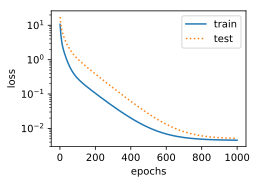

In [6]:
num_epochs = 1000
# Pick the first four dimensions, i.e. 1, x, x^2, x^3 from the polynomial
# features
fit_and_plot(poly_features[:n_train, 0:4], poly_features[n_train:, 0:4],
             labels[:n_train], labels[n_train:])

### Linear Function Fitting (Underfitting)

Let’s take another look at linear function fitting.  Naturally, after the decline in the early epoch, it’s difficult to further decrease this model’s training error rate.  After the last epoch iteration has been completed, the training error rate is still high.  When used in data sets generated by non-linear models (like the third-order polynomial function) linear models are susceptible to underfitting.

final epoch: train loss 0.8632341 test loss 3.3509688
weight: [[ 4.9286675  3.378654  -2.6716104]]


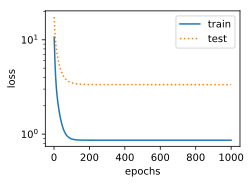

In [7]:
num_epochs = 1000
# Pick the first four dimensions, i.e. 1, x from the polynomial features
fit_and_plot(poly_features[:n_train, 0:3], poly_features[n_train:, 0:3],
             labels[:n_train], labels[n_train:])

### Insufficient Training (Overfitting)

In practice, if the model hasn’t been trained sufficiently, it is still easy to overfit even if a third-order polynomial function with the same order as the data generation model is used.  Let's train the model using a polynomial of too high degree. There is insufficient data to pin down the fact that all higher degree coefficients are close to zero. This will result in a model that’s too complex to be easily influenced by noise in the training data.  Even if the training error rate is low, the testing error data rate will still be high.

Try out different model complexities (`n_degree`) and training set sizes (`n_subset`) to gain some intuition of what is happening.

final epoch: train loss 0.005195727 test loss 0.03171328
weight: [[ 4.9594827e+00  1.2578113e+00 -3.2019548e+00  5.2781482e+00
  -6.3597226e-01  1.3322377e+00 -1.6332561e-02  2.0420527e-01
  -6.1856657e-02  5.8489904e-02 -3.7162639e-02 -6.7995541e-02
   3.7113667e-02 -1.9592555e-02  6.2177807e-02  3.2198682e-02
   3.4999892e-02 -4.5971844e-02 -2.2483468e-02  2.9451251e-03]]


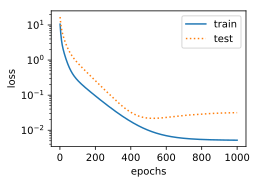

In [8]:
num_epochs = 1000
n_subset = 100  # Subset of data to train on
n_degree = 20   # Degree of polynomials
fit_and_plot(poly_features[1:n_subset, 0:n_degree],
             poly_features[n_train:, 0:n_degree], labels[1:n_subset],
             labels[n_train:])

Further along in later chapters, we will continue discussing overfitting problems and methods for dealing with them, such as weight decay and dropout.


## Summary

* Since the generalization error rate cannot be estimated based on the training error rate, simply minimizing the training error rate will not necessarily mean a reduction in the generalization error rate. Machine learning models need to be careful to safeguard against overfitting such as to minimize the generalization error.
* A validation set can be used for model selection (provided that it isn't used too liberally).
* Underfitting means that the model is not able to reduce the training error rate while overfitting is a result of the model training error rate being much lower than the testing data set rate.
* We should choose an appropriately complex model and avoid using insufficient training samples.


## Exercises

1. Can you solve the polynomial regression problem exactly? Hint - use linear algebra.
1. Model selection for polynomials
    * Plot the training error vs. model complexity (degree of the polynomial). What do you observe?
    * Plot the test error in this case.
    * Generate the same graph as a function of the amount of data?
1. What happens if you drop the normalization of the polynomial features $x^i$ by $1/i!$. Can you fix this in some other way?
1. What degree of polynomial do you need to reduce the training error to 0?
1. Can you ever expect to see 0 generalization error?

## Scan the QR Code to [Discuss](https://discuss.mxnet.io/t/2341)

![](../img/qr_underfit-overfit.svg)